In [1]:
import pandas as pd
import numpy as np
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('austin_weather.csv')

In [3]:
df.describe(include=[np.number])

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [4]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [5]:
date_time = pd.to_datetime(df.pop('Date'))

In [6]:
cols = list(df.columns[:-1])
df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

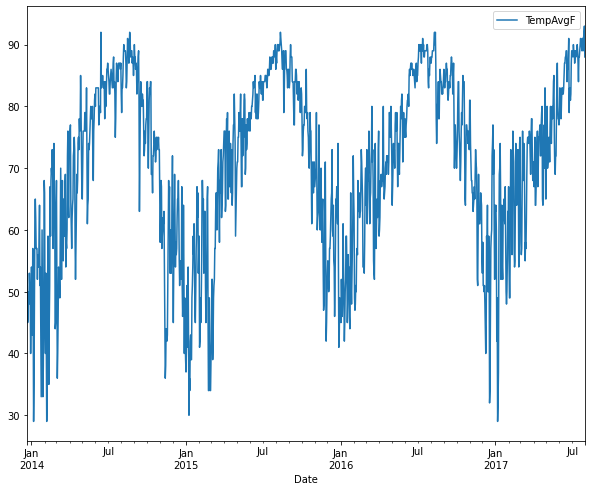

In [7]:
plot_cols = ['TempAvgF']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TempHighF,1319.0,80.862778,14.766523,32.000000,72.00,83.00,92.000000,107.000000
TempAvgF,1319.0,70.642914,14.045904,29.000000,62.00,73.00,83.000000,93.000000
TempLowF,1319.0,59.902958,14.190648,19.000000,49.00,63.00,73.000000,81.000000
DewPointHighF,1312.0,61.515244,13.586452,13.000000,53.00,66.00,73.000000,80.000000
DewPointAvgF,1312.0,56.632622,14.866272,8.000000,46.00,61.00,69.000000,76.000000
DewPointLowF,1312.0,50.933689,16.187481,2.000000,38.00,56.00,65.000000,75.000000
HumidityHighPercent,1317.0,87.872437,11.038636,37.000000,85.00,90.00,94.000000,100.000000
HumidityAvgPercent,1317.0,66.671982,12.463634,27.000000,59.00,67.00,74.000000,97.000000
HumidityLowPercent,1317.0,44.958996,16.974632,10.000000,33.00,44.00,55.000000,93.000000
SeaLevelPressureHighInches,1316.0,30.112204,0.180149,29.629999,29.99,30.08,30.209999,30.830000


In [9]:
df.isna().sum()

TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

In [10]:
for col in cols[:-1]:
    df[col].interpolate(method="polynomial", order=3, direction = "forward", inplace=True)
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].fillna(0)
df = df.drop('Events', 1)

C:\Users\Sminal\AppData\Local\Temp\ipykernel_18068\2981043520.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Events', 1)


In [11]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [12]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [13]:
train_df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,-0.349657,-0.635432,-0.924174,0.487260,-0.414027,-0.394942,0.475118,0.650744,0.672730,-1.433379,-2.033487,-2.027705,0.056511,-1.362488,-1.273648,1.927340,-0.502376,1.613371,0.692317
1,-1.550652,-1.475193,-1.338459,-1.245622,-1.273525,-1.304302,0.475118,0.101017,-0.130722,1.614907,0.588933,-0.394099,0.056511,0.592771,-0.464571,0.778125,0.449413,0.605461,-0.266623
2,-1.417208,-1.685134,-1.821792,-2.112063,-1.868561,-1.607422,-1.043551,-1.155502,-1.048954,2.446257,2.686878,2.756413,0.056511,0.592771,0.883891,-1.520305,-0.978270,-1.578345,-0.266623
3,-1.217042,-1.615154,-1.890839,-1.751046,-1.802446,-1.728670,0.117784,-0.841372,-1.335901,2.446257,2.453779,2.114638,0.056511,0.592771,0.074814,-0.371090,-0.502376,-0.234465,-0.266623
4,-1.417208,-1.335233,-1.200364,-1.173419,-1.009064,-0.819310,-0.150217,0.336614,0.615340,1.614907,1.754460,1.939616,0.056511,0.592771,0.074814,-0.945697,-1.454165,-0.906405,-0.266623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1.051503,1.184052,1.216298,1.137090,1.172738,1.181282,1.100452,0.493679,0.041446,0.173896,0.239279,0.306010,0.056511,-0.058982,-0.464571,-0.083786,-0.026481,-0.402450,-0.266623
919,1.118225,1.184052,1.147251,1.064887,1.040507,1.120658,-0.060883,-0.134580,-0.188112,0.118471,0.181001,0.247665,0.056511,0.592771,0.883891,-1.520305,-1.454165,-1.074390,-0.266623
920,1.451834,1.254032,0.940108,0.920480,1.040507,1.120658,1.100452,0.179549,-0.475059,-0.324916,-0.052097,0.014300,0.056511,-0.058982,-1.543341,3.651163,-0.978270,2.957252,0.421312
921,1.118225,1.044092,0.871061,1.064887,0.974392,0.999410,0.475118,-0.056048,-0.360280,-0.380341,-0.343485,-0.219078,0.056511,0.592771,0.883891,-1.233001,-1.454165,-1.410360,-0.266623


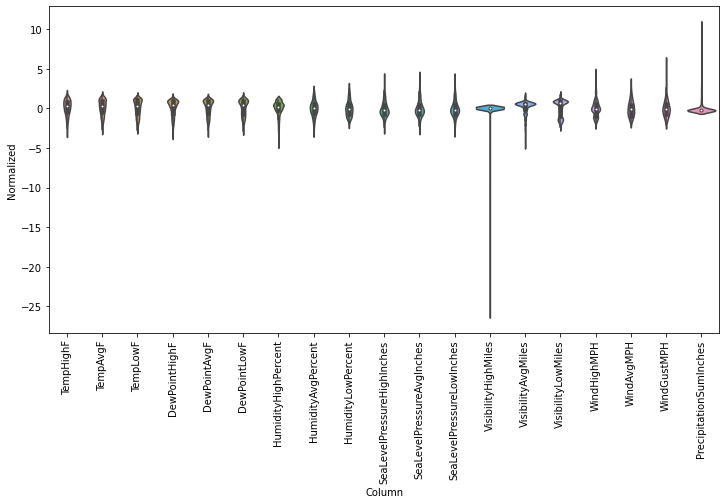

In [14]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [15]:
class WindowGen():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

        def __repr__(self):
            return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

        def split_window(self, features):
            inputs = features[:, self.input_slice, :]
            labels = features[:, self.labels_slice, :]
            if self.label_columns is not None:
                labels = tf.stack(
                    [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                    axis=-1)

            # Slicing doesn't preserve static shape information, so set the shapes
            # manually. This way the `tf.data.Datasets` are easier to inspect.
            inputs.set_shape([None, self.input_width, None])
            labels.set_shape([None, self.label_width, None])

            return inputs, labels
            
        WindowGen.split_window = split_window

        def plot(self, model=None, plot_col='TempAvgF', max_subplots=3):
            inputs, labels = self.example
            plt.figure(figsize=(12, 8))
            plot_col_index = self.column_indices[plot_col]
            max_n = min(max_subplots, len(inputs))
            for n in range(max_n):
                plt.subplot(max_n, 1, n+1)
                plt.ylabel(f'{plot_col} [normed]')
                plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                        label='Inputs', marker='.', zorder=-10)

                if self.label_columns:
                    label_col_index = self.label_columns_indices.get(plot_col, None)
                else:
                    label_col_index = plot_col_index

                if label_col_index is None:
                    continue

                plt.scatter(self.label_indices, labels[n, :, label_col_index],
                            edgecolors='k', label='Labels', c='#2ca02c', s=64)
                if model is not None:
                    predictions = model(inputs)
                    plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

                if n == 0:
                    plt.legend()

            plt.xlabel('TempAvgF')

        WindowGen.plot = plot

        def make_dataset(self, data):
            data = np.array(data, dtype=np.float32)
            ds = tf.keras.utils.timeseries_dataset_from_array(
                data=data,
                targets=None,
                sequence_length=self.total_window_size,
                sequence_stride=1,
                shuffle=True,
                batch_size=32,)

            ds = ds.map(self.split_window)

            return ds

        WindowGen.make_dataset = make_dataset

        @property
        def train(self):
            return self.make_dataset(self.train_df)

        @property
        def val(self):
            return self.make_dataset(self.val_df)

        @property
        def test(self):
            return self.make_dataset(self.test_df)

        @property
        def example(self):
            
            result = getattr(self, '_example', None)
            if result is None:
                # No example batch was found, so get one from the `.train` dataset
                result = next(iter(self.train))
                # And cache it for next time
                self._example = result
            return result

        WindowGen.train = train
        WindowGen.val = val
        WindowGen.test = test
        WindowGen.example = example

In [16]:
w1 = WindowGen(input_width=14, label_width=1, shift=1, label_columns=['TempAvgF'])

In [17]:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

In [18]:
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 15, 19)
Inputs shape: (3, 14, 19)
Labels shape: (3, 1, 1)


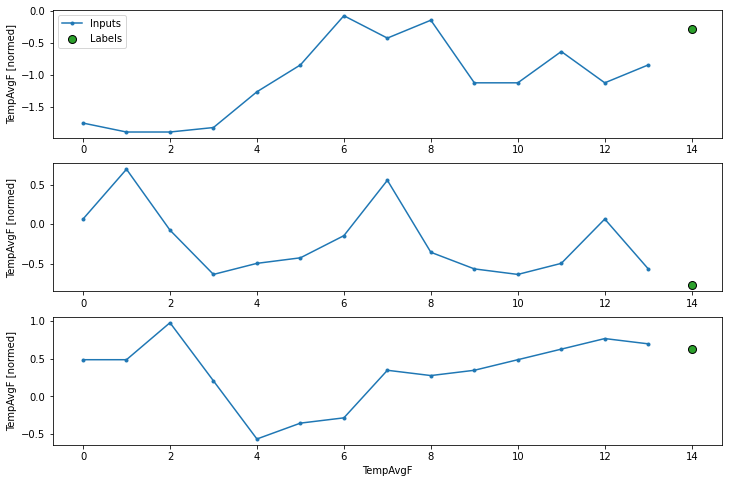

In [19]:
w1.plot()

In [20]:
w1.train.element_spec

(TensorSpec(shape=(None, 14, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [21]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 14, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [22]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

# Defining the Windows

In [23]:
single_step_window = WindowGen(
    input_width=1, label_width=1, shift=1,
    label_columns=['TempAvgF'])

wide_window = WindowGen(
    input_width=21, label_width=21, shift=1,
    label_columns=['TempAvgF'])

CONV_WIDTH = 3
conv_window = WindowGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['TempAvgF'])

In [24]:
baseline = Baseline(label_index=column_indices['TempAvgF'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

9/9 [==============================] - 0s 3ms/step - loss: 0.1638 - mean_absolute_error: 0.2765


In [25]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

# Single Step Training

In [26]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 1.3312 - mean_absolute_error: 0.9020 - val_loss: 1.2729 - val_mean_absolute_error: 0.9005
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2867 - mean_absolute_error: 0.8844 - val_loss: 1.2278 - val_mean_absolute_error: 0.8837
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2472 - mean_absolute_error: 0.8687 - val_loss: 1.1859 - val_mean_absolute_error: 0.8677
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2092 - mean_absolute_error: 0.8528 - val_loss: 1.1438 - val_mean_absolute_error: 0.8512
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 1.1709 - mean_absolute_error: 0.8368 - val_loss: 1.1024 - val_mean_absolute_error: 0.8345
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 1.1350 - mean_absolute_error: 0.8214 - val_loss: 1.0630 - val_mean_absolute_error: 0.8182
Epoch 7/100
29/29 [==

In [27]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
29/29 [==============================] - 2s 12ms/step - loss: 0.9684 - mean_absolute_error: 0.7776 - val_loss: 0.6957 - val_mean_absolute_error: 0.6767
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.6718 - mean_absolute_error: 0.6455 - val_loss: 0.5165 - val_mean_absolute_error: 0.5734
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.4842 - mean_absolute_error: 0.5416 - val_loss: 0.3931 - val_mean_absolute_error: 0.4888
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 0.3596 - mean_absolute_error: 0.4630 - val_loss: 0.3201 - val_mean_absolute_error: 0.4324
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.2832 - mean_absolute_error: 0.4080 - val_loss: 0.2736 - val_mean_absolute_error: 0.3956
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.2355 - mean_absolute_error: 0.3706 - val_loss: 0.2398 - val_mean_absolute_error: 0.3642
Epoch 7/100
29/29 [==

In [28]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])
history = compile_and_fit(multi_step_dense, conv_window)
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/100
29/29 [==============================] - 1s 12ms/step - loss: 1.4362 - mean_absolute_error: 0.9977 - val_loss: 1.0374 - val_mean_absolute_error: 0.8668
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.0074 - mean_absolute_error: 0.8315 - val_loss: 0.7441 - val_mean_absolute_error: 0.7374
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.7240 - mean_absolute_error: 0.6974 - val_loss: 0.5517 - val_mean_absolute_error: 0.6253
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.5324 - mean_absolute_error: 0.5837 - val_loss: 0.4360 - val_mean_absolute_error: 0.5341
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.4132 - mean_absolute_error: 0.4907 - val_loss: 0.3762 - val_mean_absolute_error: 0.4708
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.3496 - mean_absolute_error: 0.4351 - val_loss: 0.3537 - val_mean_absolute_error: 0.4398
Epoch 7/100
29/29 [==

In [29]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['TempAvgF'])

In [30]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
history = compile_and_fit(conv_model, conv_window)
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/100
29/29 [==============================] - 2s 16ms/step - loss: 0.9270 - mean_absolute_error: 0.8036 - val_loss: 1.0091 - val_mean_absolute_error: 0.8591
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.7494 - mean_absolute_error: 0.7237 - val_loss: 0.8325 - val_mean_absolute_error: 0.7869
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6211 - mean_absolute_error: 0.6584 - val_loss: 0.6950 - val_mean_absolute_error: 0.7241
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.5203 - mean_absolute_error: 0.6021 - val_loss: 0.5861 - val_mean_absolute_error: 0.6704
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.4390 - mean_absolute_error: 0.5514 - val_loss: 0.4946 - val_mean_absolute_error: 0.6195
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.3722 - mean_absolute_error: 0.5039 - val_loss: 0.4165 - val_mean_absolute_error: 0.5681
Epoch 7/100
29/29 [==

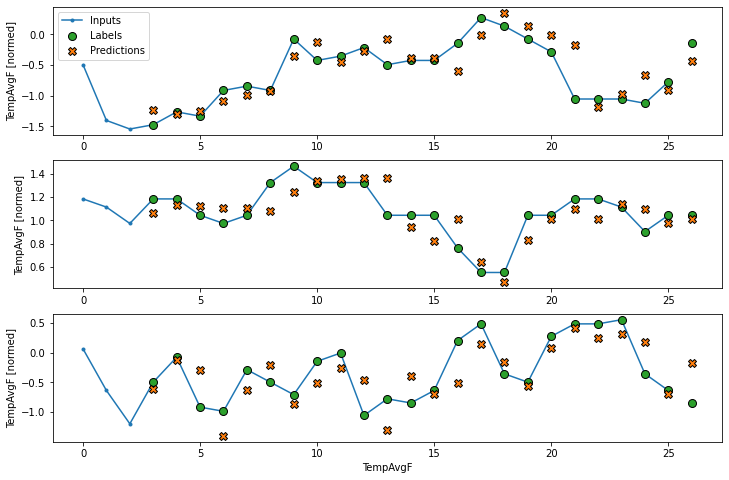

In [31]:
wide_conv_window.plot(conv_model)

In [32]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(64, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

8/8 [==============================] - 0s 5ms/step - loss: 0.1229 - mean_absolute_error: 0.2584


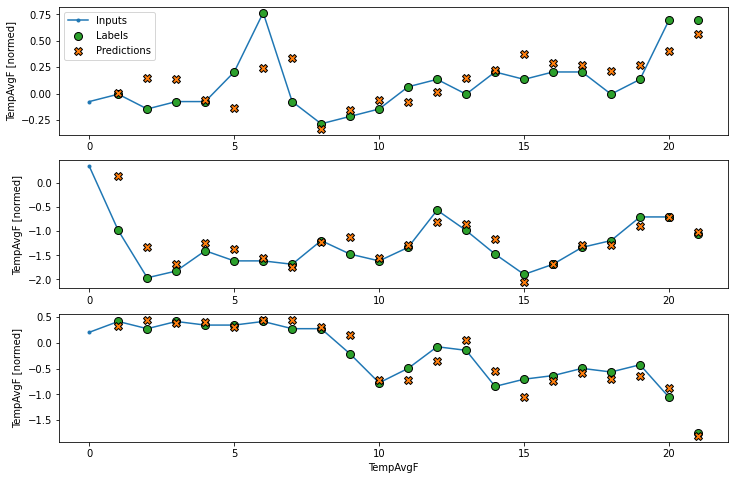

In [34]:
wide_window.plot(lstm_model)

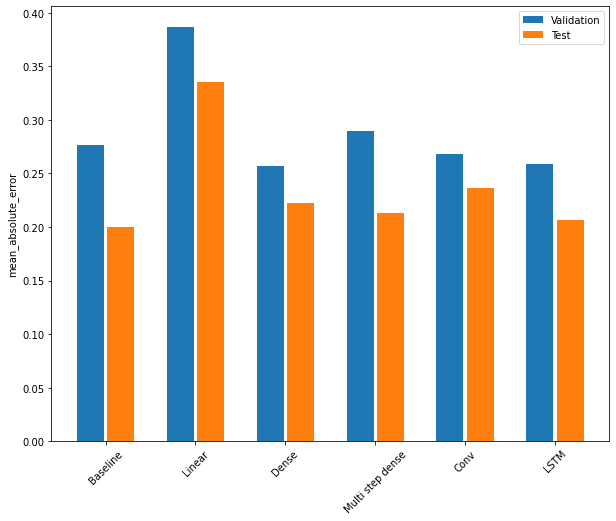

In [35]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [36]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1998
Linear      : 0.3353
Dense       : 0.2227
Multi step dense: 0.2127
Conv        : 0.2366
LSTM        : 0.2070


In [37]:
performance

{'Baseline': [0.0844116285443306, 0.19979064166545868],
 'Linear': [0.17937149107456207, 0.33527782559394836],
 'Dense': [0.09470182657241821, 0.2227250039577484],
 'Multi step dense': [0.08133362233638763, 0.21268314123153687],
 'Conv': [0.09853367507457733, 0.23660390079021454],
 'LSTM': [0.07523062080144882, 0.2069917619228363]}

# Multi-output Models

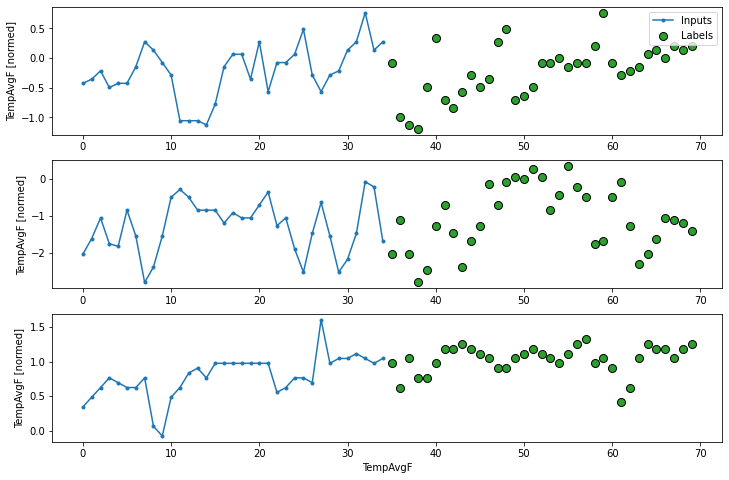

In [38]:
OUT_STEPS = 35
multi_window = WindowGen(input_width=35,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

7/7 [==============================] - 0s 3ms/step - loss: 1.4823 - mean_absolute_error: 0.8489


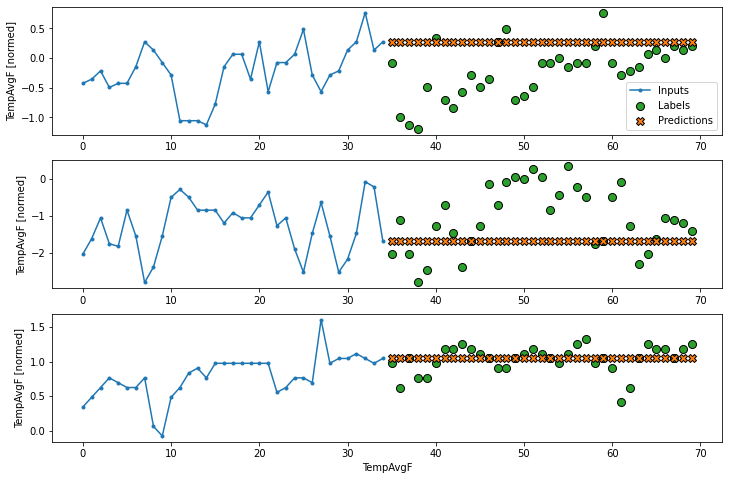

In [39]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

7/7 [==============================] - 0s 3ms/step - loss: 1.5027 - mean_absolute_error: 0.8644


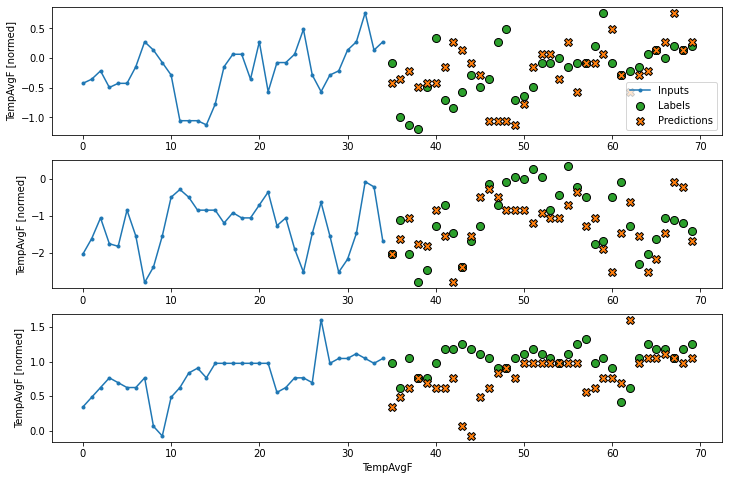

In [40]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

7/7 [==============================] - 0s 1ms/step - loss: 0.8579 - mean_absolute_error: 0.6875


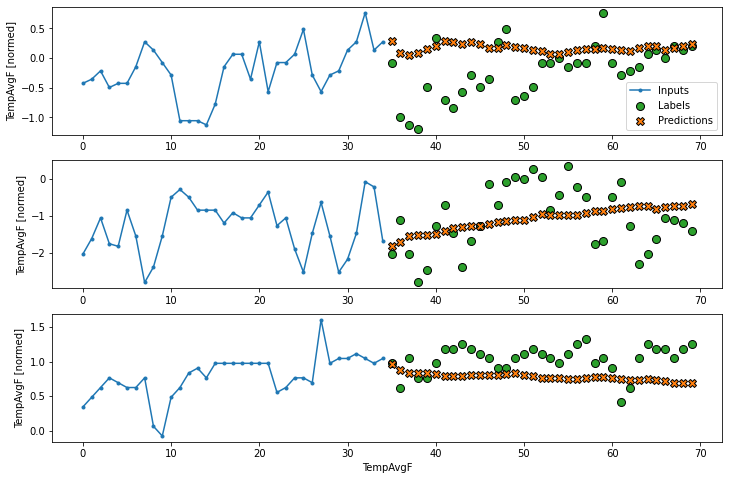

In [41]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

7/7 [==============================] - 0s 2ms/step - loss: 0.8482 - mean_absolute_error: 0.6786


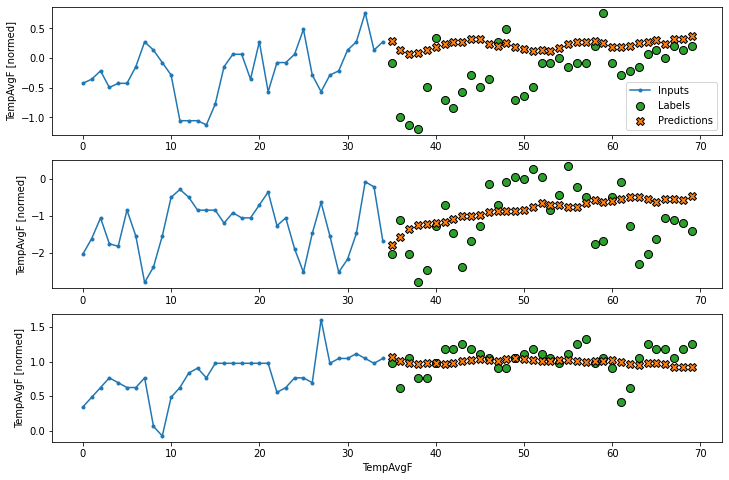

In [42]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(256, activation='relu'),
    
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

7/7 [==============================] - 0s 3ms/step - loss: 0.8402 - mean_absolute_error: 0.6740


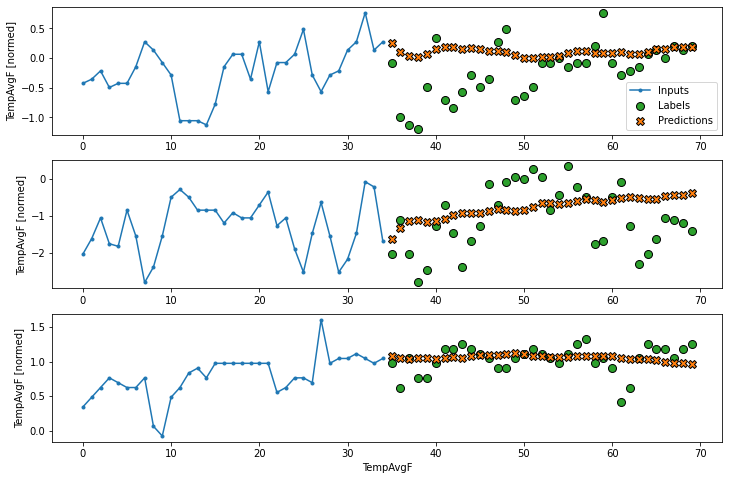

In [43]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

7/7 [==============================] - 0s 6ms/step - loss: 0.7975 - mean_absolute_error: 0.6710


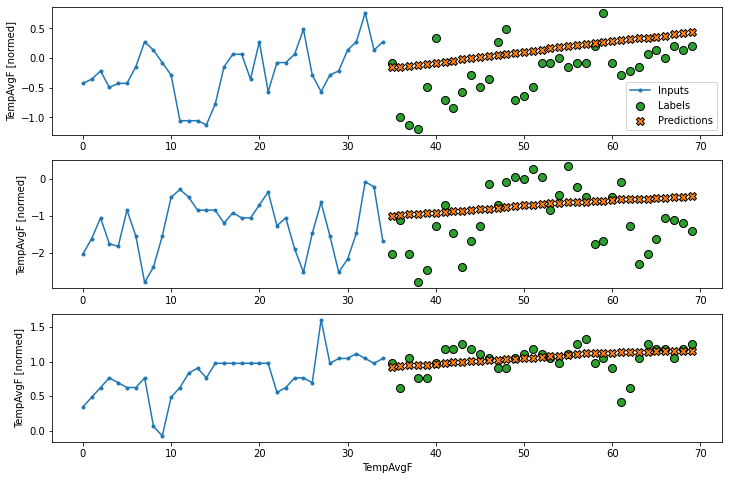

In [44]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(64, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

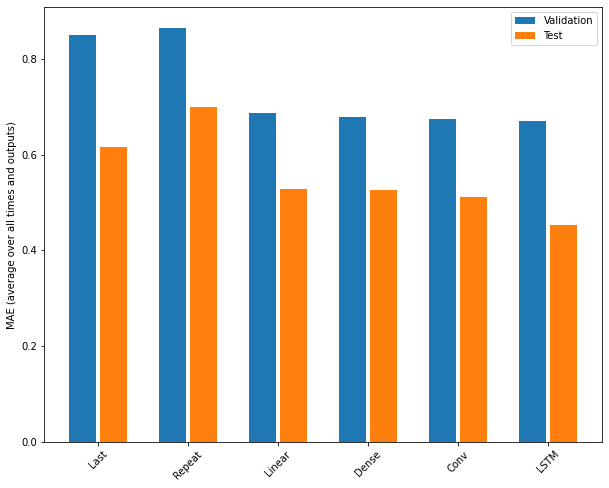

In [45]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [46]:
multi_performance

{'Last': [0.8100537657737732, 0.6168420314788818],
 'Repeat': [0.953110933303833, 0.6997560858726501],
 'Linear': [0.4579356908798218, 0.5283333659172058],
 'Dense': [0.46704792976379395, 0.5255418419837952],
 'Conv': [0.4445328414440155, 0.51075279712677],
 'LSTM': [0.38098257780075073, 0.4524279236793518]}